# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](http://greenteapress.com/wp/complexity2), Chapter 2

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [36]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import networkx as nx
import numpy as np

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [37]:
from thinkstats2 import RandomSeed
RandomSeed(17)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [38]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
G.nodes()

['Alice', 'Bob', 'Chuck']

Here's how we add edges between nodes.

In [39]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
G.edges()

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

And here's how to draw the graph.

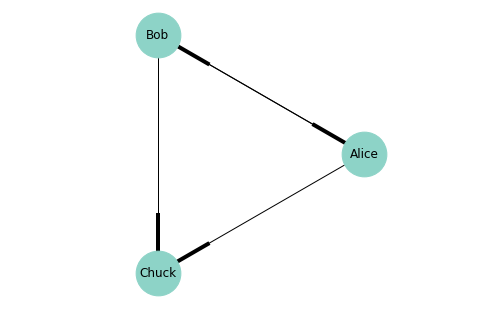

In [40]:
nx.draw_circular(G, 
                 node_color=COLORS[0], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
plt.savefig('chap02-1.pdf')

**Exercise:**  Add another node and a few more edges and draw the graph again.

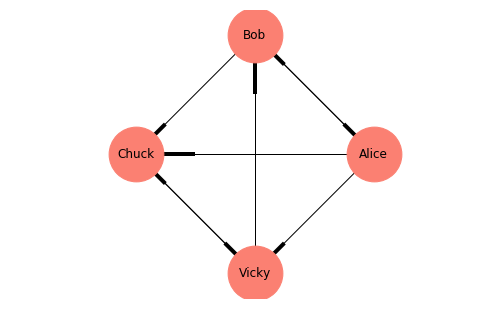

In [41]:
# Solution goes here
G.add_node('Vicky')
G.add_edge('Vicky', 'Bob')
G.add_edge('Vicky', 'Chuck')
G.add_edge('Chuck', 'Vicky')
G.add_edge('Alice', 'Vicky')
nx.draw_circular(G, node_color=COLORS[3], node_size=3000, with_labels=True)
plt.axis('equal')
plt.savefig('chap2-v1.pdf')

(-0.65750000000000053, 1.1575, -1.0572277381308828, 1.0572277381308828)

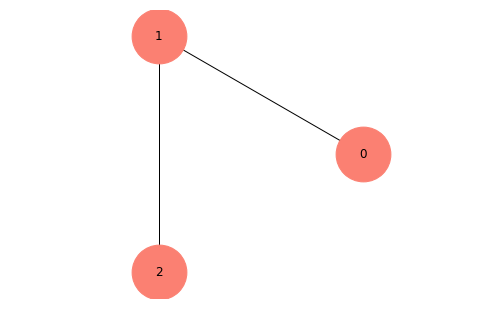

In [65]:
import random
def random_tree(n):
    G = nx.Graph()
    for i in range(n):
        G.add_node(i)
        if len(G.nodes())>1:
            connection = i
            while connection == i:
                connection = random.sample(G.nodes(), 1)[0]
            G.add_edge(i, connection)
    return G

graph = random_tree(3)
nx.draw_circular(graph, node_color=COLORS[3], node_size=3000, with_labels=True)
plt.axis('equal')

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`pos` is a dictionary that maps from each city to its coordinates.

In [43]:
pos = dict(Albany=(-74, 43),
          Boston=(-71, 42),
          NYC=(-74, 41),
          Philly=(-75, 40))
pos['Albany']

(-74, 43)

We can use the keys in `pos` to add nodes to the graph.

In [44]:
G = nx.Graph()
G.add_nodes_from(pos)
G.nodes()

['Albany', 'Boston', 'NYC', 'Philly']

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [45]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [46]:
G.add_edges_from(drive_times)
G.edges()

[('Albany', 'Boston'), ('Albany', 'NYC'), ('Boston', 'NYC'), ('NYC', 'Philly')]

Now we can draw the graph using `pos` to indicate the positions of the nodes, and `drive_times` to label the edges.

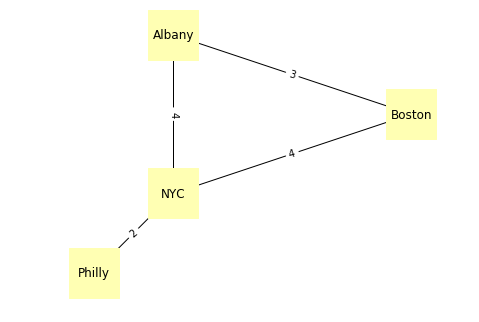

In [47]:
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('chap02-2.pdf')

**Exercise:**  Add another city and at least one edge.

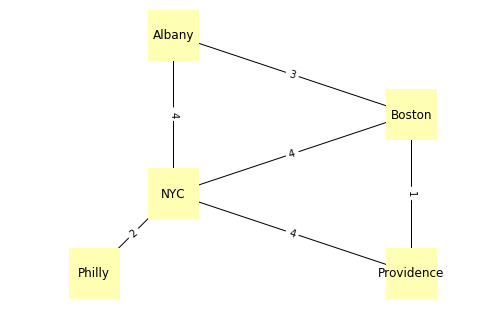

In [48]:
# Solution goes here
pos['Providence'] = (-71, 40)
drive_times[('Boston', 'Providence')] = 1
drive_times[('NYC', 'Providence')] = 4
G.add_edges_from(drive_times)

nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('chap02-v2.pdf')

## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [49]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [50]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [51]:
complete = make_complete_graph(10)
len(complete.nodes())

10

And here's what it looks like.

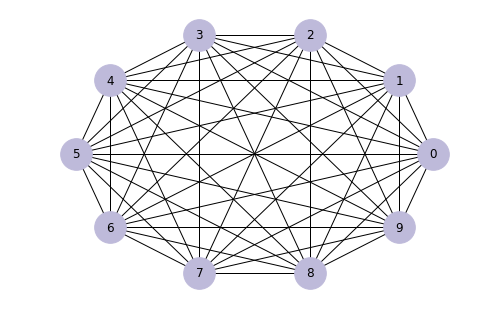

In [52]:
nx.draw_circular(complete, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-3.pdf')

The `neighbors` method returns a list of neighbors for a given node.

In [53]:
complete.neighbors(0)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

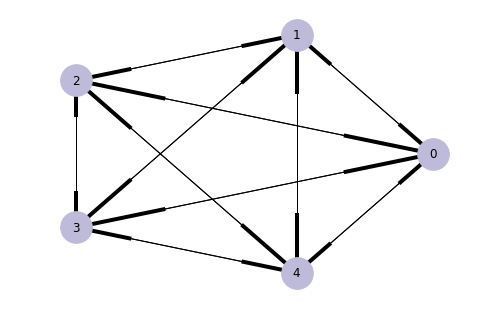

In [54]:
# Solution goes here
def make_complete_directed_graph(n):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    G.add_edges_from(G.reverse().edges())
    return G

complete = make_complete_directed_graph(5)
len(complete.nodes())

nx.draw_circular(complete, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-v3.pdf')

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [55]:
from numpy.random import random

def flip(p):
    return random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [56]:
def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j and flip(p):
                yield u, v
                
def random_pairs_better(nodes, p):
    for pair in all_pairs(nodes):
        if flip(p):
            yield pair

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [57]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs_better(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [58]:
random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

17

And here's what it looks like:

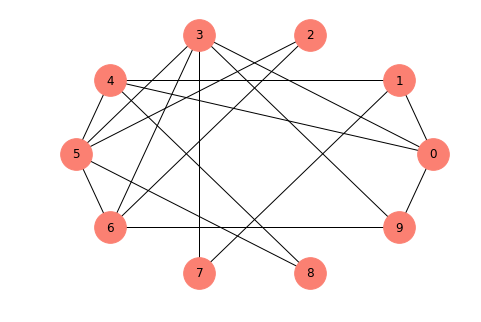

In [59]:
nx.draw_circular(random_graph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-4.pdf')

In [61]:
def all_triangles(G):
    for node in G.nodes():
        if len(G.neighbors(node)) > 2:
            for neighbor in G.neighbors(node):
                if len(G.neighbors(neighbor))>1:
                    for secondn in G.neighbors(neighbor):
                        if node in G.neighbors(secondn):
                            yield(node, neighbor, secondn)
                            
for triangle in all_triangles(random_graph):
    print(triangle)

(0, 1, 4)
(0, 3, 9)
(0, 4, 1)
(0, 9, 3)
(1, 0, 4)
(1, 4, 0)
(3, 0, 9)
(3, 5, 6)
(3, 6, 5)
(3, 6, 9)
(3, 9, 0)
(3, 9, 6)
(4, 0, 1)
(4, 1, 0)
(4, 5, 8)
(4, 8, 5)
(5, 2, 6)
(5, 3, 6)
(5, 4, 8)
(5, 6, 2)
(5, 6, 3)
(5, 8, 4)
(6, 2, 5)
(6, 3, 5)
(6, 3, 9)
(6, 5, 2)
(6, 5, 3)
(6, 9, 3)
(9, 0, 3)
(9, 3, 0)
(9, 3, 6)
(9, 6, 3)


## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [26]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [27]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [28]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [29]:
def is_connected(G):
    start = next(G.nodes_iter())
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [30]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [31]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

6

Check if it is connected

In [32]:
is_connected(random_graph)

False

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

True
True


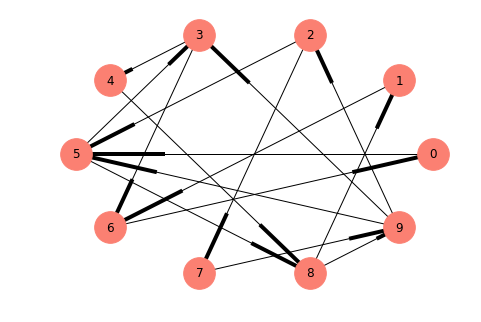

In [33]:
# Solution goes here
# I would say that for a directed graph to be connected all nodes must be connected through 
# a connection in the appropriate direction that leads to the next node.
# A weak connection is when there is a path between any pair of vertices and a strong connection
# is when there is a directed path between every pair of vertices
def random_directed_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if flip(p):
                yield u, v
                
def make_random_directed_graph(n, p):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_directed_pairs(nodes, p))
    return G

random_directed_graph = make_random_directed_graph(10, 0.2)
nx.draw_circular(random_directed_graph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-v4.pdf')

# nothing changes in reachable_nodes because neighbors only returns the neigbors who have a directed
# connection in a directed graph, but now we need to account for times when reachable nodes > G
def directed_is_connected(G):
    start = next(G.nodes_iter())
    reachable = reachable_nodes(G, start)
    if len(reachable) < len(G):
        return False
    return True

print(directed_is_connected(random_directed_graph))
print(directed_is_connected(complete))

## Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [34]:
def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

With `n=10` and `p=0.3`, the probability of being connected is about 65%.

In [35]:
n = 10
prob_connected(n, 0.3, iters=10000)

0.6536

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [36]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [37]:
ps = np.logspace(-1.3, 0, 11)
ps

array([ 0.05011872,  0.0676083 ,  0.09120108,  0.12302688,  0.16595869,
        0.22387211,  0.30199517,  0.40738028,  0.54954087,  0.74131024,  1.        ])

I'll estimate the probabilities with `iters=1000`

In [38]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.0501187233627 0.0
0.0676082975392 0.0
0.0912010839356 0.003
0.123026877081 0.021
0.165958690744 0.096
0.223872113857 0.301
0.30199517204 0.682
0.407380277804 0.916
0.549540873858 0.99
0.741310241301 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

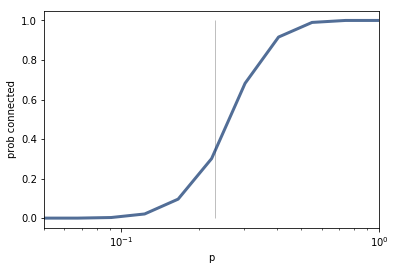

In [39]:
import thinkplot

thinkplot.vlines([pstar], 0, 1, color='gray')
thinkplot.plot(ps, ys)
thinkplot.config(xlabel='p', ylabel='prob connected', xscale='log', xlim=[ps[0], ps[-1]])
plt.savefig('chap02-5.pdf')

We can run the same analysis for a few more values of `n`.

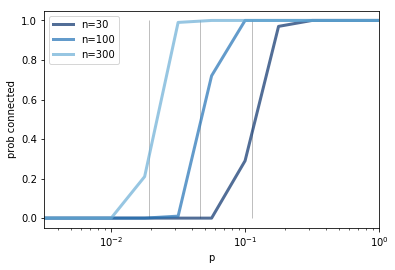

In [40]:
ns = [30, 100, 300]
ps = np.logspace(-2.5, 0, 11)

thinkplot.preplot(len(ns))
for n in ns:
    pstar = np.log(n) / n
    thinkplot.vlines([pstar], 0, 1, color='gray')

    ys = [prob_connected(n, p) for p in ps]
    thinkplot.plot(ps, ys, label='n=%d' % n)

thinkplot.config(xlabel='p', ylabel='prob connected',
                 xscale='log', xlim=[ps[0], ps[-1]],
                 loc='upper left')
plt.savefig('chap02-6.pdf')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = next(G.nodes_iter())
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

In [41]:
# Solution goes here
'''Getting the first element in an iterator can be done in constant time. Comparing the length of the graph
and reachable is either constant or linear time. Therefore the overall performance of is_connected is the
same as that of reachable_nodes, O(n+m), because that is the hardest computation the function performs.'''

'Getting the first element in an iterator can be done in constant time. Comparing the length of the graph\nand reachable is either constant or linear time. Therefore the overall performance of is_connected is the\nsame as that of reachable_nodes, O(n+m), because that is the hardest computation the function performs.'

**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [54]:
# This would not change the order of growth because the same number of checks need to be performed
# either way. At best, it might make the program a tad faster because is is not adding unnecessary things
# to the stack.
def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            for n in G.neighbors(node):
                if n not in seen:
                    stack.append(n)
    return seen

In [55]:
# Solution goes here
# All the time that is being saved by the new function is in constant time and the order of growth still remains
# the same at O(n+m). Therefore, the amount of time that it takes to complete this function is almost the same
# as the amount of time it took to perform the original reachable_nodes function. 

In [56]:
%timeit len(reachable_nodes(complete, 0))

7.55 µs ± 430 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [57]:
%timeit len(reachable_nodes_precheck(complete, 0))

7.26 µs ± 21.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [103]:
# Solution goes here
import random

def m_pairs(nodes, m):
    return random.sample(list(all_pairs(nodes)), m)

/home/vmcdermott/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/vmcdermott/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/vmcdermott/miniconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/vmcdermott/miniconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnin

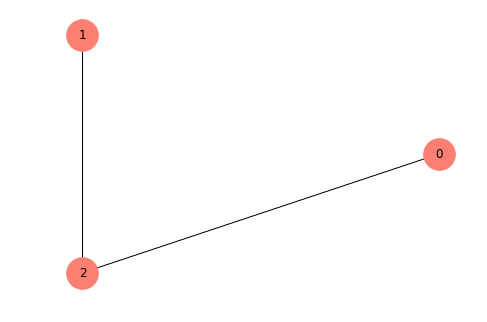

In [104]:
# Solution goes here
def make_m_graph(n, m):
    G = nx.Graph()
    for i in range(0, n):
        G.add_node(i)
    edges = m_pairs(G.nodes(), m)
    G.add_edges_from(edges)
    return G

graph = make_m_graph(3, 2)
nx.draw_circular(graph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-v4.pdf')

In [110]:
# Solution goes here
def prob_m_connected(n, m, iters=100):
    count = 0
    for i in range(iters):
        graph = make_m_graph(n, m)
        if is_connected(graph):
            count += 1
    return count/iters

n = 10
prob_m_connected(n, 10)


0.31

[7, 9, 10, 12, 13, 15, 18, 20, 23, 27, 31]
[0.0, 0.097, 0.273, 0.578, 0.67, 0.818, 0.949, 0.975, 0.995, 1.0, 1.0]


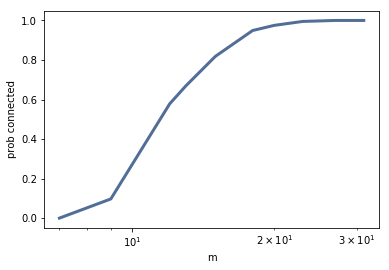

In [111]:

ms = np.logspace(.9, 1.5, 11)
ms = ([int(m) for m in ms])
print(ms)

ys = [prob_m_connected(n, m, 1000) for m in ms]
print(ys)

thinkplot.plot(ms, ys)
thinkplot.config(xlabel='m', ylabel='prob connected', xscale='log')
plt.savefig('chap02-v8.pdf')

The probability of connectivity for this experiment is a more gradual upwards trend as opposed to the probability of connectivity in the other ER graph where there was a very sharp cutoff at the critical value